# `ir_metadata`: An Extensible Metadata Schema for IR Experiments

This notebook introduces our outlined metadata annotation schema for TREC runs and exemplifies the software support implemented by [`repro_eval`](https://github.com/irgroup/repro_eval). The setup and introductory section is followed by the experiments of Section 6 in the resource paper. More information can also be found on the corresponding [website](https://irgroup.github.io/ir_metadata/).

## Setup: Download the data and install the Python package `repro_eval`

Please execute the following code cell to download the required run data and metadata annotations. Furthermore, the most recent version of `repro_eval==0.4.0` will be installed.

In [4]:
# download data and install repro_eval
!wget https://zenodo.org/record/5997491/files/demo.tar.xz && tar -xf demo.tar.xz
!pip install repro_eval==0.4.0

     |████████████████████████████████| 99 kB 5.7 MB/s 
     |████████████████████████████████| 180 kB 43.5 MB/s 
     |████████████████████████████████| 109 kB 65.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 546 kB 41.3 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=d4bf57d74965f566cb3782c56fa57177d15d0fa420eed1ad5e771016ab396424
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for pytrec-eval: filename=pytrec_eval-0.5-cp37-cp37m-linux_x86_64.whl size=265262 sha256=91496ba72f498fae8cb0299d5ef8ae06d643f729a097a7cb8015b83769487097
  Stored in directory: /root/.cache/pip/wheels/42/96/77/0829b8b2606f90f61ba10a51277629d2b615604e122ee932f4
Successfully built py-cpuinfo pytrec-eval


## Introduction to the metadata schema and the `MetadataHandler`

We will start with an example run without annotations, to which we will add the metadata with the help of the `MetadataHandler`. First, let us verify hat the run is not annotated and afterward look at the metadata.

In [32]:
# print the 10 first line of the run file
!head -n 10 ./demo/runs/intro/bps.ccrf

397	Q0	47008c87fd4d5bc0af1965c66305745c	0	0.096933890892036	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	093e9464-bb47-11e3-9c3c-311301e2167d	1	0.0966916359508239	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	2c65470a-5acd-11e4-b812-38518ae74c67	2	0.0957230030836941	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	a7c290057d8896878bc0a1a2fa5f66f9	3	0.095202949376904	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	018b521a-58a0-11e4-bd61-346aee66ba29	4	0.0947724343949816	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	7dfb417f61e52c1ba2ce6e58f8c3647c	5	0.0932420043062949	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	0529d9ac-fe52-11e4-805c-c3f407e5a9e9	6	0.0931256171031504	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	4c0fa346afb21b9f7bf7afe1dc17292c	7	0.0927160846571995	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	2f8c36f4-121a-11e6-8967-7ac733c56f12	8	0.0896570157466596	bps.ccrf.google_title_desc.core18.uwmrg
397	Q0	a7641aaa-3ef9-11e6-80bc-d06711fd2125	9	0.0872575445518071	bps.ccrf

In [6]:
# print the corresponding metadata file
!cat ./demo/runs/intro/bps.ccrf.yaml

schema-version: 0.1
run-version: 1.0
tag: bps.ccrf.ddg_title.core18.uwmrg
platform:
  hardware:
    cpu:
      model: Intel(R) Xeon(R) Gold 6144 CPU @ 3.50GHz
      architecture: x86_64
      operation mode: 64-bit
      number of cores: 16
    ram: 64 GB
  operating system:
    kernel: GNU/Linux 4.15.0-166-generic
    distribution: Ubuntu 18.04.5 LTS
  software:
    libraries:
      python:
      - matplotlib==3.1.0
      - beautifulsoup4==4.7.1
      - scikit-learn==0.21.2
      - scipy==1.3.0
      - pandas==0.24.2
      - numpy==1.16.4
      - tqdm==4.32.1
      - nltk==3.4.4
      - lxml==4.3.4
research goal:
  venue:
    name: CLEF
    year: 2021
  publication:
    dblp: https://dblp.uni-trier.de/rec/conf/clef/BreuerPS21
    doi: https://doi.org/10.1007/978-3-030-85251-1_5
    abstract: In this work, we analyze a pseudo-relevance retrieval method based on the results of web search engines. By enriching topics with text data from web search engine result pages and linked contents,

Let us import the metadata module of `repro_eval` and instantiate the `MetadataHandler` with the run and metadata files.

In [7]:
from repro_eval import metadata 

RUN_PATH = './demo/runs/intro/bps.ccrf'
META_PATH = './demo/runs/intro/bps.ccrf.yaml'

metadata_handler = metadata.MetadataHandler(run_path=RUN_PATH, 
                                            metadata_path=META_PATH)

Once a `MetadataHandler` object has been instantiated, it is possible to return the metadata in a `dict`-structure with the help of the `get_metadata()` method. Of course, specific entries can be read out by their corresponding keys. 

In [8]:
# get_metadata
md = metadata_handler.get_metadata()

The metadata information about the Platform should include the underlying hardware, the operating system, and the used software libraries. `software` covers packages or libraries that are used for the Implementation. If a retrieval toolkit is used, it should be reported explicitly.

In [9]:
from pprint import pprint
pprint(md.get('platform'))

{'hardware': {'cpu': {'architecture': 'x86_64',
                      'model': 'Intel(R) Xeon(R) Gold 6144 CPU @ 3.50GHz',
                      'number of cores': 16,
                      'operation mode': '64-bit'},
              'ram': '64 GB'},
 'operating system': {'distribution': 'Ubuntu 18.04.5 LTS',
                      'kernel': 'GNU/Linux 4.15.0-166-generic'},
 'software': {'libraries': {'python': ['matplotlib==3.1.0',
                                       'beautifulsoup4==4.7.1',
                                       'scikit-learn==0.21.2',
                                       'scipy==1.3.0',
                                       'pandas==0.24.2',
                                       'numpy==1.16.4',
                                       'tqdm==4.32.1',
                                       'nltk==3.4.4',
                                       'lxml==4.3.4']}}}


The metadata information about the Research goal should include information about the venue for which the study was made, the corresponding publications, as well as some information about the evaluation. If the Actor is reported as a reproducer, the baseline refers to the tag of the original run that is reimplemented. Otherwise, it should be a strong and reasonable baseline if the Actor is the original experimenter.

In [10]:
pprint(md.get('research goal'))

{'evaluation': {'baseline': ['uwmrg'],
                'reported measures': ['map', 'P_10', 'ndcg']},
 'publication': {'abstract': 'In this work, we analyze a pseudo-relevance '
                             'retrieval method based on the results of web '
                             'search engines. By enriching topics with text '
                             'data from web search engine result pages and '
                             'linked contents, we train topic-specific and '
                             'cost-efficient classifiers that can be used to '
                             'search test collections for relevant documents. '
                             'Building upon attempts initially made at TREC '
                             'Common Core 2018 by Grossman and Cormack, we '
                             'address questions of system performance over '
                             'time considering different search engines, '
                             'queries, and test

The metadata information about the Implementation should include the URL of the open-source repository if available. If so, the commit at which the code of the repository was used should be made explicit. If the experiments are run from the command line, the corresponding commands including all the arguments and parameters should be added.

In [11]:
pprint(md.get('implementation'))

{'executable': {'cmd': 'python -m uwmrg.scrape && python -m uwmrg.vectorize && '
                       'python -m uwmrg.prep_train && python -m '
                       'uwmrg.prep_test && python -m uwmrg.rank'},
 'source': {'commit': '1d49b65',
            'lang': ['python'],
            'repository': 'https://github.com/irgroup/clef2021-web-prf'}}


The metadata information about the Method should include if the run is automatic or manual, i.e., derived with or without a human-in-the-loop approach, and information regarding the indexing and retrieval.

In [12]:
pprint(md.get('method'))

{'automatic': True,
 'features': {'analyzer': 'word',
              'binary': False,
              'max_df': 1.0,
              'max_features': 1.0,
              'min_df': 1,
              'ngram-range': '(1,1)',
              'norm': 'l2',
              'preprocessing': True,
              'robust_only': True,
              'smooth_idf': True,
              'sublinear_tf': True,
              'use_idf': True},
 'indexing': {'stemmer': 'nltk.stem.porter.PorterStemmer',
              'stopwords': "nltk.corpus.stopwords.words('english')",
              'tokenizer': "nltk.tokenize.RegexpTokenizer(r'\\w+')"},
 'retrieval': [{'C': 1.5,
                'max_iter': 100,
                'name': 'lr ranker',
                'solver': 'lbfgs',
                'tol': 0.0001}]}


The metadata information about the Actor should include all available public information about the experimenter who actually executed the software of the experiments. Often this person is hidden behind the co-authorship, and the metadata should report how to reach the experimenter for further questions. The role identifies if the author is the original experimenter or the reproducer of a run/experiment.

In [13]:
pprint(md.get('actor'))

{'degree': 'M.Sc.',
 'fields': ['ir', 'reproducible science', 'living labs'],
 'github': 'https://github.com/breuert',
 'name': 'Timo Breuer',
 'orcid': '0000-0002-1765-2449',
 'role': 'reproducer',
 'team': 'IRC'}


The metadata information about the Data should include the test collection, training data, and others. For the test collection, the data source, as well as the location of the qrels and topics files, have to be reported. If available, the identifier that is chosen by the data catalog ir_datasets should be reported as well. The example below uses web search results as training data.

In [14]:
pprint(md.get('data'))

{'test collection': {'ir_datasets': 'https://ir-datasets.com/wapo',
                     'name': 'TREC Washington Post Corpus v2',
                     'qrels': 'https://trec.nist.gov/data/core/qrels2018.txt',
                     'source': 'https://trec.nist.gov/data/wapost/',
                     'topics': 'https://trec.nist.gov/data/core/topics2018.txt'},
 'training data': [{'data_source': 'webpages',
                    'query': 'title+desc',
                    'search_engine': 'Google'}]}


Let us write the metadata into the run file. If no run name is specified by the `run_path` variable, the annotated run is written to a file by the same name of the run file without annotations but with the "_annotated" extension.

In [15]:
# write_metadata
metadata_handler.write_metadata()
!head -n 128 './demo/runs/intro/bps.ccrf_annotated'

# ir_metadata.start
# schema-version: 0.1 
# run-version: 1.0 
# tag: bps.ccrf.ddg_title.core18.uwmrg 
# platform: 
#   hardware: 
#     cpu: 
#       model: Intel(R) Xeon(R) Gold 6144 CPU @ 3.50GHz 
#       architecture: x86_64 
#       operation mode: 64-bit 
#       number of cores: 16 
#     ram: 64 GB 
#   operating system: 
#     kernel: GNU/Linux 4.15.0-166-generic 
#     distribution: Ubuntu 18.04.5 LTS 
#   software: 
#     libraries: 
#       python: 
#       - matplotlib==3.1.0 
#       - beautifulsoup4==4.7.1 
#       - scikit-learn==0.21.2 
#       - scipy==1.3.0 
#       - pandas==0.24.2 
#       - numpy==1.16.4 
#       - tqdm==4.32.1 
#       - nltk==3.4.4 
#       - lxml==4.3.4 
# research goal: 
#   venue: 
#     name: CLEF 
#     year: 2021 
#   publication: 
#     dblp: https://dblp.uni-trier.de/rec/conf/clef/BreuerPS21 
#     doi: https://doi.org/10.1007/978-3-030-85251-1_5 
#     abstract: In this work, we analyze a pseudo-relevance retrieval method based on the r

t is possible for some of the PRIMAD components (Platform, Implementation) to annotate them automatically. We will remove these components from the metadata `dict` and hand them over to the `metadata_handler` with the `set_metadata()` method. Afterward, we will clone the underlying [GitHub repository](https://github.com/irgroup/clef2021-web-prf) of the run file. The path to the cloned repository is required for the `complete_metadata()` method.

In [16]:
md.pop('platform', None)
md.pop('implementation', None)

# set_metadata
metadata_handler.set_metadata(metadata_dict=md)

# complete_metadata
!git clone https://github.com/irgroup/clef2021-web-prf.git
metadata_handler.complete_metadata(repo_path='./clef2021-web-prf/')

Cloning into 'clef2021-web-prf'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 103 (delta 34), reused 96 (delta 30), pack-reused 0
Receiving objects: 100% (103/103), 26.42 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (34/34), done.


It is also possible to dump the metadata into a separate YAML file with the help of the `dump_metadata()` method. The `MetadataHandler` class also provides some static methods, e.g., to directly read a metadata file, what we will do by the `read_metadata()` method. Afterward, we have a look at the automatically annotated PRIMAD components.

In [17]:
# dump_metadata
metadata_handler.dump_metadata(dump_path='.')

# read_metadata_template
tag = md.get('tag')
meta_path = '_'.join([tag, 'dump.yaml'])
md_auto = metadata.MetadataHandler.read_metadata_template(metadata_path=meta_path)

Let us have a look a the Implementation. The `MetadataHandler` read out information about the last commit, the used languages, and the URL of the code repository.

In [18]:
md_auto.get('implementation')

{'commit': '1d49b65f5cc7dadc83eb7ffd188d290a1e9ffc75',
 'lang': ['Markdown',
  'JSON',
  'Python',
  'Groff',
  'CSV',
  'Jupyter Notebook',
  'Text',
  'YAML'],
 'repository': 'https://github.com/irgroup/clef2021-web-prf.git'}

Let us have a look at the Platform. **Please note that the available information of your Colab backend was read out!** In this case, information about the CPU, available RAM, the OS, and the installed software libraries were automatically added.

In [19]:
md_auto.get('platform')

{'hardware': {'cpu': {'architecture': 'x86_64',
   'model': 'Intel(R) Xeon(R) CPU @ 2.20GHz',
   'number of cores': 2,
   'operation mode': '64-bit'},
  'ram': '12.69 GB'},
 'operating system': {'distribution': 'Ubuntu 18.04.5 LTS',
  'kernel': '5.4.144+',
  'platform': 'Linux'},
 'software': {'libraries': {'python': ['zipp',
    'zict',
    'xlwt',
    'xlrd',
    'xgboost',
    'xarray',
    'wrapt',
    'wordcloud',
    'widgetsnbextension',
    'wheel',
    'Werkzeug',
    'webencodings',
    'wcwidth',
    'wasabi',
    'vega-datasets',
    'urllib3',
    'uritemplate',
    'tzlocal',
    'typing-extensions',
    'typeguard',
    'tweepy',
    'traitlets',
    'tqdm',
    'tornado',
    'torchvision',
    'torchtext',
    'torchsummary',
    'torchaudio',
    'torch',
    'toolz',
    'tomli',
    'tifffile',
    'threadpoolctl',
    'thinc',
    'Theano-PyMC',
    'textblob',
    'text-unidecode',
    'testpath',
    'terminado',
    'termcolor',
    'tensorflow',
    'tensorflow

The `MetadataHandler` also has other static methods that can be used to strip off the metadata and load the run into the program as it is supported by `pytrec_eval` and `repro_eval`.

In [20]:
# strip_metadata
annotated_run_path = '_'.join([RUN_PATH,'annotated'])
metadata.MetadataHandler.strip_metadata(annotated_run=annotated_run_path)

defaultdict(dict,
            {'321': {'9171debc316e5e2782e0d2404ca7d09d': 0.0459646997470625,
              '4a7c2970fd9bf65fe09c7cf46df7b06d': 0.0459646997470625,
              'eacd327b20aa77a2aa909596ae336497': 0.0452450170257823,
              'c02ac2d073c936694e7e62d1366c106f': 0.0374426716276865,
              '8d735dd62a4a358a041036e838df3adc': 0.0374426716276865,
              '26bc19e4431b05a06a2494e3117642c7': 0.0357759703976275,
              '8e123fde1ffaaf2184f01e00fee60810': 0.0356205946053609,
              '6f6037f1e6c8292c011eae57ca216b03': 0.0354632611259866,
              '8f5895b36230630bce7717d79b8024c3': 0.0354632611259866,
              '00f57310e5c8ec7833d6756ba637332e': 0.0346911318679064,
              'eb8eeb3fde8373c9b89cc95ad63d4a92': 0.0344969498917758,
              '81a3cf19017aca2cc50bcff202719ffe': 0.0344686021201714,
              '72a305fa4d12f8c71bf980e11eb76bd8': 0.034080577389181,
              '2dc68b3a57e14923c0a92e68e055cd6f': 0.03407564543615

Finally, it is also possible to read out the metadata from an annotated run file.

In [21]:
# read_metadata
metadata.MetadataHandler.read_metadata(run_path=RUN_PATH + '_annotated')

{'actor': {'degree': 'M.Sc.',
  'fields': ['ir', 'reproducible science', 'living labs'],
  'github': 'https://github.com/breuert',
  'name': 'Timo Breuer',
  'orcid': '0000-0002-1765-2449',
  'role': 'reproducer',
  'team': 'IRC'},
 'data': {'test collection': {'ir_datasets': 'https://ir-datasets.com/wapo',
   'name': 'TREC Washington Post Corpus v2',
   'qrels': 'https://trec.nist.gov/data/core/qrels2018.txt',
   'source': 'https://trec.nist.gov/data/wapost/',
   'topics': 'https://trec.nist.gov/data/core/topics2018.txt'},
  'training data': [{'data_source': 'webpages',
    'query': 'title+desc',
    'search_engine': 'Google'}]},
 'implementation': {'executable': {'cmd': 'python -m uwmrg.scrape && python -m uwmrg.vectorize && python -m uwmrg.prep_train && python -m uwmrg.prep_test && python -m uwmrg.rank'},
  'source': {'commit': '1d49b65',
   'lang': ['python'],
   'repository': 'https://github.com/irgroup/clef2021-web-prf'}},
 'method': {'automatic': True,
  'features': {'analyzer':

The annotated runs are still compatible with trec_eval. The comments feature will be officially supported as part of v.10.0

In [22]:
!git clone -b version-10.0-dev --single-branch https://github.com/usnistgov/trec_eval.git && cd trec_eval && make && cd ..
!./trec_eval/trec_eval ./demo/qrels/core18.txt ./demo/runs/intro/bps.ccrf_annotated

Cloning into 'trec_eval'...
remote: Enumerating objects: 508, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 508 (delta 0), reused 0 (delta 0), pack-reused 507
Receiving objects: 100% (508/508), 424.43 KiB | 1.75 MiB/s, done.
Resolving deltas: 100% (360/360), done.
gcc -g -I.  -Wall -Wno-macro-redefined -DVERSIONID=\"10.0-dev\"  -o trec_eval trec_eval.c formats.c meas_init.c meas_acc.c meas_avg.c meas_print_single.c meas_print_final.c gain_init.c get_qrels.c get_trec_results.c get_prefs.c get_qrels_prefs.c get_qrels_jg.c form_res_rels.c form_res_rels_jg.c form_prefs_counts.c utility_pool.c get_zscores.c convert_zscores.c measures.c  m_map.c m_P.c m_num_q.c m_num_ret.c m_num_rel.c m_num_rel_ret.c m_gm_map.c m_Rprec.c m_recip_rank.c m_bpref.c m_iprec_at_recall.c m_recall.c m_Rprec_mult.c m_utility.c m_11pt_avg.c m_ndcg.c m_ndcg_cut.c m_Rndcg.c m_ndcg_rel.c m_binG.c m_G.c m_rel_P.c m_success.c m_infap.c m_map_cut.c m_gm_bpref.c m_runid.c m_relstring.c m_set_P.c m_set_reca

## 6.1 PRIM'AD: Parameter sweeps of the Method

In this experiment, we will analyze the parameter sweeps of a retrieval method. More specifically, we use the runs that resulted from our regression test of the [Anserini notebook](https://github.com/castorini/anserini/blob/master/docs/runbook-ecir2019-ccrf.md). The runs differ by the interpolation weights between the scores of the first-stage ranker (BM25) and the machine learning reranker. The reimplemented runs are based on the _cross collection relevance feedback_ (CCRF) method that has originally been introduced by [Grossmann and Cormack](https://trec.nist.gov/pubs/trec26/papers/MRG_UWaterloo-CC.pdf) as part of TREC Common Core 2017. Regarding the `metadata` module, the `MetadataHandler` and the `PrimadExperiment` are introduced.

First, we will instantiate the `MetadataAnalyzer` and afterward analyze a directory wrt. the specified reference run with the `analyze_directory()` method. `experiments` is a `dict` that holds list of run paths that correspond to the different types of PRIMAD experiments that are possible. In this case, we are interested in changes of the Method (parameter sweeps) which correspond to the key `priMad` (note the upper-case letter M).

In [23]:
from repro_eval import metadata

RUN_DIR = './demo/runs/6.1/'
PRIMAD = 'priMad'

qrels = './demo/qrels/core17.txt'
ref_run = './demo/runs/6.1/h2oloo.ccrf.04.core17.lr_0.1'
metadata_analyzer = metadata.MetadataAnalyzer(run_path=ref_run)

experiments = metadata_analyzer.analyze_directory(RUN_DIR)

primad_experiment = metadata.PrimadExperiment(ref_base_path=ref_run,
                                              primad=PRIMAD,
                                              rep_base=experiments.get(PRIMAD),
                                              rpd_qrels=qrels)
output_04_17 = primad_experiment.evaluate()

For better comparison, we also analyze the reproductions wrt. an advanced (better performing) run and with another dataset (`core18`).

In [24]:
ref_run = './demo/runs/6.1/h2oloo.ccrf.0405.core17.lr_0.1'
metadata_analyzer.set_reference(run_path=ref_run)
experiments = metadata_analyzer.analyze_directory(RUN_DIR)
experiment = experiments.get(PRIMAD)
primad_experiment = metadata.PrimadExperiment(ref_base_path=ref_run,
                                     primad=PRIMAD,
                                     rep_base=experiments.get(PRIMAD),
                                     rpd_qrels=qrels)
output_0405_17 = primad_experiment.evaluate()

qrels = './demo/qrels/core18.txt'
ref_run = './demo/runs/6.1/h2oloo.ccrf.04.core18.lr_0.1'
metadata_analyzer.set_reference(run_path=ref_run)
experiments = metadata_analyzer.analyze_directory(RUN_DIR)
experiment = experiments.get(PRIMAD)
primad_experiment = metadata.PrimadExperiment(ref_base_path=ref_run,
                                     primad=PRIMAD,
                                     rep_base=experiments.get(PRIMAD),
                                     rpd_qrels=qrels)
output_04_18 = primad_experiment.evaluate()

ref_run = './demo/runs/6.1/h2oloo.ccrf.0405.core18.lr_0.1'
metadata_analyzer.set_reference(run_path=ref_run)
experiments = metadata_analyzer.analyze_directory(RUN_DIR)
experiment = experiments.get('priMad')
primad_experiment = metadata.PrimadExperiment(ref_base_path=ref_run,
                                     primad=PRIMAD,
                                     rep_base=experiments.get(PRIMAD),
                                     rpd_qrels=qrels)
output_0405_18 = primad_experiment.evaluate()

The following code makes plots from the evaluations.

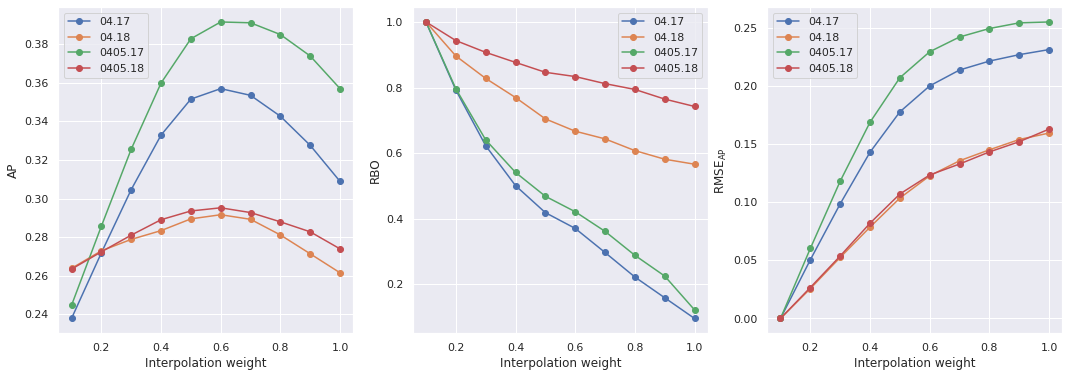

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
FIGSIZE=(5,5)

ap_04_17 = {}
rmse_04_17 = {}
rbo_04_17 = {}

for weight in [str(round(i*0.1, 2)) for i in range(1,11)]:
    run_name = ''.join(['h2oloo.ccrf.04.core17.lr_', weight])
    topic_num = len(output_04_17.get(run_name).get('arp').values())
    ap_04_17[float(weight)] = sum([scores.get('map') for scores in output_04_17.get(run_name).get('arp').values()]) / topic_num
    rbo_04_17[float(weight)] = sum(output_04_17.get(run_name).get('rbo').values()) / topic_num
    rmse_04_17[float(weight)] = output_04_17.get(run_name).get('rmse').get('map')

ap_04_18 = {}
rmse_04_18 = {}
rbo_04_18 = {}

for weight in [str(round(i*0.1, 2)) for i in range(1,11)]:
    run_name = ''.join(['h2oloo.ccrf.04.core18.lr_', weight])
    topic_num = len(output_04_18.get(run_name).get('arp').values())
    ap_04_18[float(weight)] = sum([scores.get('map') for scores in output_04_18.get(run_name).get('arp').values()]) / topic_num
    rbo_04_18[float(weight)] = sum(output_04_18.get(run_name).get('rbo').values()) / topic_num
    rmse_04_18[float(weight)] = output_04_18.get(run_name).get('rmse').get('map')

ap_0405_17 = {}
rmse_0405_17 = {}
rbo_0405_17 = {}

for weight in [str(round(i*0.1, 2)) for i in range(1,11)]:
    run_name = ''.join(['h2oloo.ccrf.0405.core17.lr_', weight])
    topic_num = len(output_0405_17.get(run_name).get('arp').values())
    ap_0405_17[float(weight)] = sum([scores.get('map') for scores in output_0405_17.get(run_name).get('arp').values()]) / topic_num
    rbo_0405_17[float(weight)] = sum(output_0405_17.get(run_name).get('rbo').values()) / topic_num
    rmse_0405_17[float(weight)] = output_0405_17.get(run_name).get('rmse').get('map')

ap_0405_18 = {}
rmse_0405_18 = {}
rbo_0405_18 = {}

for weight in [str(round(i*0.1, 2)) for i in range(1,11)]:
    run_name = ''.join(['h2oloo.ccrf.0405.core18.lr_', weight])
    topic_num = len(output_0405_18.get(run_name).get('arp').values())
    ap_0405_18[float(weight)] = sum([scores.get('map') for scores in output_0405_18.get(run_name).get('arp').values()]) / topic_num
    rbo_0405_18[float(weight)] = sum(output_0405_18.get(run_name).get('rbo').values()) / topic_num
    rmse_0405_18[float(weight)] = output_0405_18.get(run_name).get('rmse').get('map')

df_data_rmse = {'04.17': rmse_04_17,
                '04.18': rmse_04_18,
                '0405.17': rmse_0405_17,
                '0405.18': rmse_0405_18}
df_data_rbo = {'04.17': rbo_04_17,
               '04.18': rbo_04_18,
               '0405.17': rbo_0405_17,
               '0405.18': rbo_0405_18}
df_data_ap = {'04.17': ap_04_17,
              '04.18': ap_04_18,
              '0405.17': ap_0405_17,
              '0405.18': ap_0405_18}

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
pd.DataFrame.from_dict(df_data_ap).plot.line(style='o-', ax=ax1, xlabel='Interpolation weight', ylabel='AP')
pd.DataFrame.from_dict(df_data_rbo).plot.line(style='o-', ax=ax2, xlabel='Interpolation weight', ylabel='RBO')
pd.DataFrame.from_dict(df_data_rmse).plot.line(style='o-', ax=ax3, xlabel='Interpolation weight', ylabel='$\mathregular{RMSE_{AP}}$')


## Separate figures
# pd.DataFrame.from_dict(df_data_rmse).plot.line(style='o-', figsize=FIGSIZE)
# plt.xlabel('Interpolation weight')
# plt.ylabel('$\mathregular{RMSE_{AP}}$')
# plt.savefig('priMad_nrmse.pdf', type='pdf', format='pdf', bbox_inches='tight')
# plt.show()

# pd.DataFrame.from_dict(df_data_rbo).plot.line(style='o-', figsize=FIGSIZE)
# plt.xlabel('Interpolation weight')
# plt.ylabel('RBO')
# plt.savefig('priMad_rbo.pdf', type='pdf', format='pdf', bbox_inches='tight')
# plt.show()

# pd.DataFrame.from_dict(df_data_ap).plot.line(style='o-', figsize=FIGSIZE)
# plt.xlabel('Interpolation weight')
# plt.ylabel('AP')
# plt.savefig('priMad_ap.pdf', type='pdf', format='pdf', bbox_inches='tight')
# plt.show()

As seen from the plots, the retrieval performance (AP) peaks at an interpolation weight of approx. 0.6, which complies with the results of Yu et al. and confirms the success of our regression tests. With an increasing interpolation weight, the influence of the reranker increases. This results in a decreasing RBO score, as the document rankings more and more deviate. Likewise, the error between the topic score distributions increases as shown by the RMSE. Furthermore, there is a clear difference between the results that are derived from different test collections.

## 6.2 P'R'I'M'A'D: Reproducing the experiments

In the following experiment, we evaluate the reproducibility of CCRF. This means we evaluate the results from different Platforms, Research goals, Implementations, Methods, and Actors, and the **same Data**, which corresponds to the `PRIMAd` identifier. We will use the original runs `WCrobust04` and `WCrobust0405` as a reference to which we compare the reproduction by Yu et al. and Breuer et al. We will output the evaluations in a table.

In [26]:
from repro_eval import metadata

PRIMAD = 'PRIMAd'

RUN_DIR = './demo/runs/6.2/'
QRELS = './demo/qrels/core17.txt'

run_base = './demo/runs/6.2/WCrobust04'
metadata_analyzer = metadata.MetadataAnalyzer(run_path=run_base)
experiments_base = metadata_analyzer.analyze_directory(RUN_DIR)

run_adv = './demo/runs/6.2/WCrobust0405'
metadata_analyzer.set_reference(run_path=run_adv)
experiments_adv = metadata_analyzer.analyze_directory(RUN_DIR)

primad_experiment = metadata.PrimadExperiment(ref_base_path=run_base,
                                     ref_adv_path=run_adv,
                                     primad=PRIMAD,
                                     rep_base=experiments_base.get(PRIMAD),
                                     rep_adv=experiments_adv.get(PRIMAD),
                                     rpd_qrels=QRELS)

evaluations = primad_experiment.evaluate()

Let us compare the evaluations in a table.

In [27]:
import pandas as pd
import tabulate

df_data = {}
TREC_MEASURE = 'map'

for team in evaluations.keys():
    results = {}

    topic_num = len(evaluations.get(team).get('arp').get('baseline').values())
    results['AP (Baseline)'] = sum([scores.get(TREC_MEASURE) for scores in evaluations.get(team).get('arp').get('baseline').values()]) / topic_num
    
    topic_num = len(evaluations.get(team).get('ktu').get('baseline').values())
    results['KTU (Baseline)'] = sum(evaluations.get(team).get('ktu').get('baseline').values()) / topic_num
    results['RBO (Baseline)'] = sum(evaluations.get(team).get('rbo').get('baseline').values()) / topic_num
    
    results['RMSE (Baseline)'] = evaluations.get(team).get('rmse').get('baseline').get(TREC_MEASURE)
    results['p-value (Baseline)'] = evaluations.get(team).get('pval').get('baseline').get(TREC_MEASURE)
    
    topic_num = len(evaluations.get(team).get('arp').get('baseline').values())
    results['AP (Advanced)'] = sum([scores.get(TREC_MEASURE) for scores in evaluations.get(team).get('arp').get('advanced').values()]) / topic_num
    
    topic_num = len(evaluations.get(team).get('ktu').get('baseline').values())
    results['KTU (Advanced)'] = sum(evaluations.get(team).get('ktu').get('advanced').values()) / topic_num
    results['RBO (Advanced)'] = sum(evaluations.get(team).get('rbo').get('advanced').values()) / topic_num
    
    results['RMSE (Advanced)'] = evaluations.get(team).get('rmse').get('advanced').get(TREC_MEASURE)
    results['p-value (Advanced)'] = evaluations.get(team).get('pval').get('advanced').get(TREC_MEASURE)
    
    results['ER'] = evaluations.get(team).get('er').get(TREC_MEASURE)
    results['DRI'] = evaluations.get(team).get('dri').get(TREC_MEASURE)

    df_data[team] = results
    
df = pd.DataFrame.from_dict(df_data)
cols = list(df.columns)
cols.reverse()
print(df[cols].to_markdown(tablefmt="grid", floatfmt="0.4f"))

+--------------------+-------------------+---------+----------+
|                    |   WaterlooCormack |     IRC |   h2oloo |
+====================+===================+=========+==========+
| AP (Baseline)      |            0.3711 |  0.3612 |   0.4018 |
+--------------------+-------------------+---------+----------+
| KTU (Baseline)     |            1.0000 |  0.0051 |   0.0086 |
+--------------------+-------------------+---------+----------+
| RBO (Baseline)     |            1.0000 |  0.5747 |   0.1630 |
+--------------------+-------------------+---------+----------+
| RMSE (Baseline)    |            0.0000 |  0.1071 |   0.1911 |
+--------------------+-------------------+---------+----------+
| p-value (Baseline) |            1.0000 |  0.7885 |   0.1009 |
+--------------------+-------------------+---------+----------+
| AP (Advanced)      |            0.4278 |  0.4208 |   0.4487 |
+--------------------+-------------------+---------+----------+
| KTU (Advanced)     |            1.0000

Besides the retrieval performance (AP), the table compares the reimplementations (`h2oloo` by Yu et al. and `IRC` by Breuer et al.) to the original runs (`WaterlooCormack` by Grossman and Cormack) by the reproducibility measures. Overall we see that the `h2oloo` runs perform best - even better than the runs from the original experiments - but they do not reproduce the effects of the `WaterlooCormack` runs as well as the `IRC` runs.

The column identifiers are read out from the `team` of the metadata annotations. They refer to the following runs from the Table in Section 6.2 (in the resource paper):

- WaterlooCormack = GC (Grossmann and Cormack)
- h2oloo = YXL (Yu et al.)
- IRC = BFFMSSS (Breuer et al.)

## 6.3 P'R'I'M'A'D': Generalization with other Data

Finally, we evaluate a PRIMAD experiment where every component is changed. This means that, in comparison to the previous experiment, we also validate the CCRF method on different datasets. The runs of this experiment either reproduce GC runs from TREC Common Core 2017 (YXL = Yu et. al) that use an IR test collection as training data, or GC runs from TREC Common Core 2018 that use scraped web search results as training data. All of the runs are derived from four test collections, including Robust04, Robust05, Core17, and Core18. 

In [28]:
from repro_eval import metadata

PRIMAD = 'PRIMAD'
RUN_DIR = './demo/runs/6.3/'
QRELS = {'TREC Washington Post Corpus v2': './demo/qrels/core18.txt',
         'The New York Times Annotated Corpus': './demo/qrels/core17.txt',
         'TREC disks 4 and 5': './demo/qrels/robust04.txt',
         'The AQUAINT Corpus of English News Text': './demo/qrels/robust05.txt'}

primad_evaluations = {}

base_ref = './demo/runs/6.3/uwmrgx'
adv_ref = './demo/runs/6.3/uwmrg'
rpd_qrels = './demo/qrels/core18.txt'
_primad_evaluations = {}

metadata_analyzer = metadata.MetadataAnalyzer(run_path=base_ref)
experiments = metadata_analyzer.analyze_directory(RUN_DIR)
candidates = experiments.get(PRIMAD) + experiments.get('PRIMAd')
filtered_baseline_runs = metadata.MetadataAnalyzer.filter_by_baseline(ref_run=base_ref, runs=candidates)

metadata_analyzer.set_reference(adv_ref)
experiments = metadata_analyzer.analyze_directory(RUN_DIR)
candidates = experiments.get(PRIMAD) + experiments.get('PRIMAd')
filtered_advanced_runs = metadata.MetadataAnalyzer.filter_by_baseline(ref_run=adv_ref, runs=candidates)

for name, qrels in QRELS.items():
    baseline_runs = metadata.MetadataAnalyzer.filter_by_test_collection(name, filtered_baseline_runs)
    advanced_runs = metadata.MetadataAnalyzer.filter_by_test_collection(name, filtered_advanced_runs)

    primad_experiment = metadata.PrimadExperiment(ref_base_path=base_ref,
                                         ref_adv_path=adv_ref,
                                         primad=PRIMAD,
                                         rep_base=baseline_runs,
                                         rep_adv=advanced_runs,
                                         rpd_qrels=rpd_qrels,
                                         rpl_qrels=qrels)
    
    evaluations = primad_experiment.evaluate()
    _primad_evaluations[name] = list(evaluations.values())[0]
primad_evaluations['BPS'] = _primad_evaluations

base_ref = './demo/runs/6.3/WCrobust04'
adv_ref = './demo/runs/6.3/WCrobust0405'
rpd_qrels = './demo/qrels/core17.txt'
_primad_evaluations = {}

metadata_analyzer = metadata.MetadataAnalyzer(run_path=base_ref)
experiments = metadata_analyzer.analyze_directory(RUN_DIR)
candidates = experiments.get(PRIMAD) + experiments.get('PRIMAd')
filtered_baseline_runs = metadata.MetadataAnalyzer.filter_by_baseline(ref_run=base_ref, runs=candidates)

metadata_analyzer.set_reference(adv_ref)
experiments = metadata_analyzer.analyze_directory(RUN_DIR)
candidates = experiments.get(PRIMAD) + experiments.get('PRIMAd')
filtered_advanced_runs = metadata.MetadataAnalyzer.filter_by_baseline(ref_run=adv_ref, runs=candidates)

for name, qrels in QRELS.items():
    baseline_runs = metadata.MetadataAnalyzer.filter_by_test_collection(name, filtered_baseline_runs)
    advanced_runs = metadata.MetadataAnalyzer.filter_by_test_collection(name, filtered_advanced_runs)

    primad_experiment = metadata.PrimadExperiment(ref_base_path=base_ref,
                                         ref_adv_path=adv_ref,
                                         primad=PRIMAD,
                                         rep_base=baseline_runs,
                                         rep_adv=advanced_runs,
                                         rpd_qrels=rpd_qrels,
                                         rpl_qrels=qrels)

    evaluations = primad_experiment.evaluate()
    _primad_evaluations[name] = list(evaluations.values())[0]
primad_evaluations['YXL'] = _primad_evaluations   
primad_evaluations.get('YXL').keys()

/usr/local/lib/python3.7/dist-packages/repro_eval/measure/overall_effects.py:142: RuntimeWarning: invalid value encountered in double_scalars
  yield measure, (mean - mean_scores_b.get(measure)) / mean_scores_b.get(measure)


dict_keys(['TREC Washington Post Corpus v2', 'The New York Times Annotated Corpus', 'TREC disks 4 and 5', 'The AQUAINT Corpus of English News Text'])

Let us compare the generalized experiments by the retrieval performance (AP) and the reproducibility measures for the overall effects - Effect Ratio (ER) and Delta Relative Improvement (DRI).

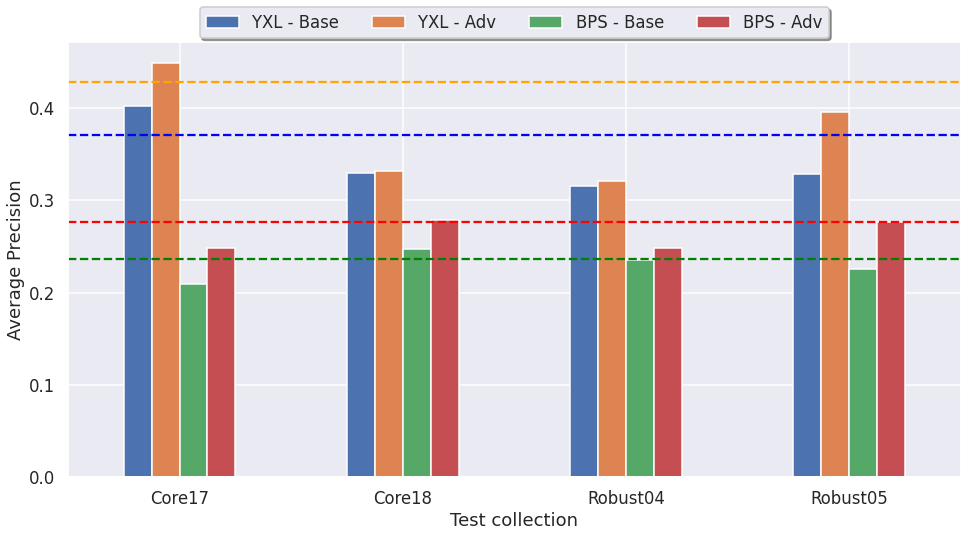

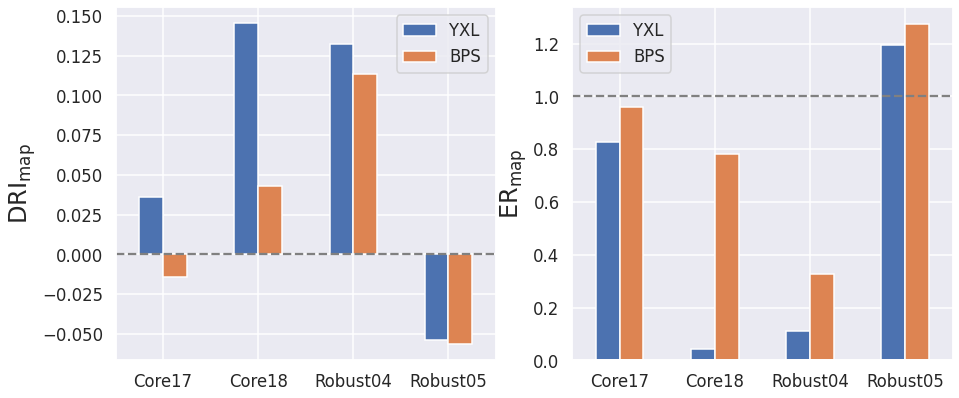

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
sns.set_context("talk")

def avg_score(scores, measure):
    return sum([s.get(measure) for s in scores]) / len(scores)

trec_measure = 'map'
run_type = 'baseline'
team = 'BPS'

bps_base = {
    'Core17': avg_score(primad_evaluations.get(team).get('The New York Times Annotated Corpus').get('arp').get(run_type).values(), trec_measure),
    'Core18': avg_score(primad_evaluations.get(team).get('TREC Washington Post Corpus v2').get('arp').get(run_type).values(), trec_measure),
    'Robust04': avg_score(primad_evaluations.get(team).get('TREC disks 4 and 5').get('arp').get(run_type).values(), trec_measure),
    'Robust05': avg_score(primad_evaluations.get(team).get('The AQUAINT Corpus of English News Text').get('arp').get(run_type).values(), trec_measure),
}

run_type = 'advanced'

bps_adv = {
    'Core17': avg_score(primad_evaluations.get(team).get('The New York Times Annotated Corpus').get('arp').get(run_type).values(), trec_measure),
    'Core18': avg_score(primad_evaluations.get(team).get('TREC Washington Post Corpus v2').get('arp').get(run_type).values(), trec_measure),
    'Robust04': avg_score(primad_evaluations.get(team).get('TREC disks 4 and 5').get('arp').get(run_type).values(), trec_measure),
    'Robust05': avg_score(primad_evaluations.get(team).get('The AQUAINT Corpus of English News Text').get('arp').get(run_type).values(), trec_measure),
}

run_type = 'baseline'
team = 'YXL'

yxl_base = {
    'Core17': avg_score(primad_evaluations.get(team).get('The New York Times Annotated Corpus').get('arp').get(run_type).values(), trec_measure),
    'Core18': avg_score(primad_evaluations.get(team).get('TREC Washington Post Corpus v2').get('arp').get(run_type).values(), trec_measure),
    'Robust04': avg_score(primad_evaluations.get(team).get('TREC disks 4 and 5').get('arp').get(run_type).values(), trec_measure),
    'Robust05': avg_score(primad_evaluations.get(team).get('The AQUAINT Corpus of English News Text').get('arp').get(run_type).values(), trec_measure),
}

run_type = 'advanced'

yxl_adv = {
    'Core17': avg_score(primad_evaluations.get(team).get('The New York Times Annotated Corpus').get('arp').get(run_type).values(), trec_measure),
    'Core18': avg_score(primad_evaluations.get(team).get('TREC Washington Post Corpus v2').get('arp').get(run_type).values(), trec_measure),
    'Robust04': avg_score(primad_evaluations.get(team).get('TREC disks 4 and 5').get('arp').get(run_type).values(), trec_measure),
    'Robust05': avg_score(primad_evaluations.get(team).get('The AQUAINT Corpus of English News Text').get('arp').get(run_type).values(), trec_measure),
}

df_data = {'YXL - Base': yxl_base,
           'YXL - Adv': yxl_adv,
           'BPS - Base': bps_base,
           'BPS - Adv': bps_adv,}

ax = pd.DataFrame.from_dict(df_data).plot.bar(rot=0, ylabel='Average Precision', xlabel='Test collection', figsize=(16,8))
ax.axhline(0.3711, linestyle='--', color='blue') # wcrobust04.map - 0.3711
ax.axhline(0.4278, linestyle='--', color='orange') # wcrobust0405.map - 0.4278
ax.axhline(0.2362, linestyle='--', color='green') # uwmrgx.map - 0.2362
ax.axhline(0.2761, linestyle='--', color='red') # uwmrg.map - 0.2761 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True, ncol=5)
plt.show()

trec_measure = 'map'
repro_measure = 'er'
team = 'YXL'

yxl_er = {
    'Core17': primad_evaluations.get(team).get('The New York Times Annotated Corpus').get(repro_measure).get(trec_measure),
    'Core18': primad_evaluations.get(team).get('TREC Washington Post Corpus v2').get(repro_measure).get(trec_measure),
    'Robust04': primad_evaluations.get(team).get('TREC disks 4 and 5').get(repro_measure).get(trec_measure),
    'Robust05': primad_evaluations.get(team).get('The AQUAINT Corpus of English News Text').get(repro_measure).get(trec_measure),
}

team = 'BPS'

bps_er = {
    'Core17': primad_evaluations.get(team).get('The New York Times Annotated Corpus').get(repro_measure).get(trec_measure),
    'Core18': primad_evaluations.get(team).get('TREC Washington Post Corpus v2').get(repro_measure).get(trec_measure),
    'Robust04': primad_evaluations.get(team).get('TREC disks 4 and 5').get(repro_measure).get(trec_measure),
    'Robust05': primad_evaluations.get(team).get('The AQUAINT Corpus of English News Text').get(repro_measure).get(trec_measure),
}

repro_measure = 'dri'
team = 'YXL'

yxl_dri = {
    'Core17': primad_evaluations.get(team).get('The New York Times Annotated Corpus').get(repro_measure).get(trec_measure),
    'Core18': primad_evaluations.get(team).get('TREC Washington Post Corpus v2').get(repro_measure).get(trec_measure),
    'Robust04': primad_evaluations.get(team).get('TREC disks 4 and 5').get(repro_measure).get(trec_measure),
    'Robust05': primad_evaluations.get(team).get('The AQUAINT Corpus of English News Text').get(repro_measure).get(trec_measure),
}

team = 'BPS'

bps_dri = {
    'Core17': primad_evaluations.get(team).get('The New York Times Annotated Corpus').get(repro_measure).get(trec_measure),
    'Core18': primad_evaluations.get(team).get('TREC Washington Post Corpus v2').get(repro_measure).get(trec_measure),
    'Robust04': primad_evaluations.get(team).get('TREC disks 4 and 5').get(repro_measure).get(trec_measure),
    'Robust05': primad_evaluations.get(team).get('The AQUAINT Corpus of English News Text').get(repro_measure).get(trec_measure),
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6.5))

df_data = {'YXL': yxl_er,
           'BPS': bps_er}

ax = pd.DataFrame.from_dict(df_data).plot.bar(rot=0, ax=ax2, ylabel='$\mathregular{ER_{map}}$')
ax.axhline(1.0, linestyle='--', color='grey')
ax.set_ylabel('$\mathregular{ER_{map}}$', fontsize=24)

df_data = {'YXL': yxl_dri,
           'BPS': bps_dri}

ax = pd.DataFrame.from_dict(df_data).plot.bar(rot=0, ax=ax1, ylabel='$\mathregular{DRI_{map}}$')
ax.axhline(0.0, linestyle='--', color='grey')
ax.set_ylabel('$\mathregular{DRI_{map}}$', fontsize=24)
plt.savefig('PRIMAD.pdf', type='pdf', format='pdf', bbox_inches='tight')
plt.show()

Overall, we see that the reproducibility of CCRF strongly depends on the combinations of the datasets. While for Core17 and Robust05, both reproduced experiments by Yu et al. (YXL) and Breuer et al. (BPS) are closer to the optimal values that are indicated by the dashed horizontal lines, it is much harder to generalize the results on other datasets like Core18 or Robust04.